In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


In [0]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
data = pd.read_csv("/gdrive/My Drive/Opening Price Prediction/stockData.csv")

In [0]:
data.tail()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
493,TCS,EQ,07-Jun-2019,2166.10,2174.0,2189.80,2142.10,2179.8,2181.75,2161.21,2659446,5.747611e+09,79783,886597,33.34
494,TCS,EQ,10-Jun-2019,2181.75,2196.7,2235.85,2185.50,2229.1,2231.50,2219.98,2080593,4.618876e+09,106316,814523,39.15
495,TCS,EQ,11-Jun-2019,2231.50,2237.0,2263.95,2231.00,2252.0,2252.80,2250.89,3048937,6.862835e+09,148188,1367975,44.87
496,TCS,EQ,12-Jun-2019,2252.80,2245.0,2266.90,2219.00,2264.0,2260.90,2241.29,2404448,5.389074e+09,141774,1036077,43.09
497,TCS,EQ,13-Jun-2019,2260.90,2264.0,2285.00,2243.05,2244.0,2254.10,2265.77,3320916,7.524421e+09,138967,1358755,40.92


In [0]:
data.columns

Index(['Symbol', 'Series', 'Date', 'Prev Close', 'Open Price', 'High Price',
       'Low Price', 'Last Price', 'Close Price', 'Average Price',
       'Total Traded Quantity', 'Turnover', 'No. of Trades', 'Deliverable Qty',
       '% Dly Qt to Traded Qty'],
      dtype='object')

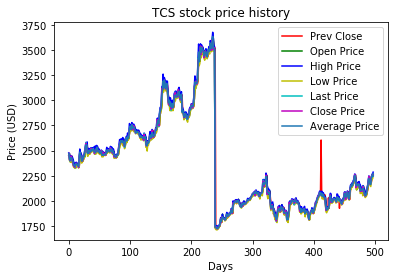

In [0]:
plt.figure()
plt.plot(data["Prev Close"], 'r')
plt.plot(data["Open Price"], 'g')
plt.plot(data["High Price"], 'b')
plt.plot(data["Low Price"], 'y')
plt.plot(data["Last Price"], 'c')
plt.plot(data["Close Price"], 'm')
plt.plot(data["Average Price"])
plt.title('TCS stock price history')
plt.ylabel('Price (USD)')
plt.xlabel('Days')
plt.legend(["Prev Close", "Open Price", "High Price", "Low Price", "Last Price", "Close Price", "Average Price"], loc='upper right')
plt.show()

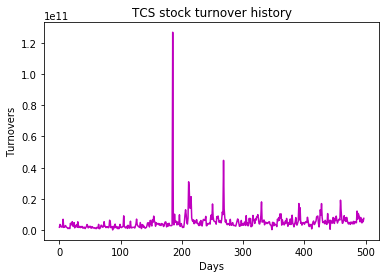

In [0]:
plt.figure()
plt.plot(data["Turnover"], 'm')
plt.title('TCS stock turnover history')
plt.ylabel("Turnovers")
plt.xlabel('Days')
plt.show()

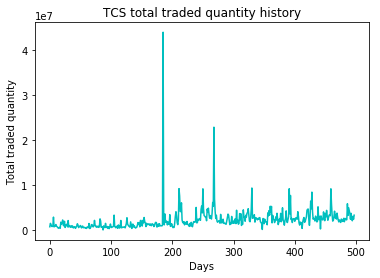

In [0]:
plt.figure()
plt.plot(data["Total Traded Quantity"], 'c')
plt.title('TCS total traded quantity history')
plt.ylabel("Total traded quantity")
plt.xlabel('Days')
plt.show()

In [0]:
print(data.isna().sum())

Symbol                    0
Series                    0
Date                      0
Prev Close                0
Open Price                0
High Price                0
Low Price                 0
Last Price                0
Close Price               0
Average Price             0
Total Traded Quantity     0
Turnover                  0
No. of Trades             0
Deliverable Qty           0
% Dly Qt to Traded Qty    0
dtype: int64


In [0]:
data.shape

(498, 15)

In [0]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [0]:
cols = ['Prev Close', 'Open Price', 'High Price',
       'Low Price', 'Last Price', 'Close Price', 'Average Price',
       'Total Traded Quantity', 'Turnover', 'No. of Trades', 'Deliverable Qty',
       '% Dly Qt to Traded Qty']

In [0]:
min_max_scaler = MinMaxScaler()
DATA = min_max_scaler.fit_transform(data.loc[:,cols].values)

In [0]:
DATA.shape

(498, 12)

In [0]:
DATA1 = DATA[:len(DATA)-1, :]

In [0]:
DATA1.shape

(497, 12)

In [0]:
LABELS = DATA[:, 1]

In [0]:
LABELS = LABELS.reshape(len(LABELS), 1)

In [0]:
LABELS.shape

(498, 1)

In [0]:
LABELS1 = LABELS[1:, :]

In [0]:
LABELS1.shape

(497, 1)

In [0]:
trainData, testData = train_test_split(DATA1, train_size=0.8, test_size=0.2, shuffle=False)
trainLabels, testLabels = train_test_split(LABELS1, train_size=0.8, test_size=0.2, shuffle=False)
print("Train data size = ", len(trainData),", Test data size = ", len(testData))

Train data size =  397 , Test data size =  100


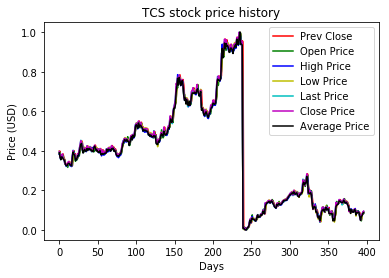

In [0]:
plt.figure()
plt.plot(trainData[:,0], 'r')
plt.plot(trainData[:,1], 'g')
plt.plot(trainData[:,2], 'b')
plt.plot(trainData[:,3], 'y')
plt.plot(trainData[:,4], 'c')
plt.plot(trainData[:,5], 'm')
plt.plot(trainData[:,6], 'k')
plt.title('TCS stock price history')
plt.ylabel('Price (USD)')
plt.xlabel('Days')
plt.legend(["Prev Close", "Open Price", "High Price", "Low Price", "Last Price", "Close Price", "Average Price"], loc='upper right')
plt.show()

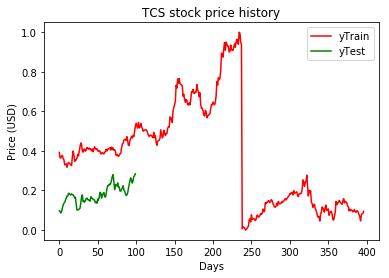

In [0]:
plt.figure()
plt.plot(trainLabels, 'r')
plt.plot(testLabels, 'g')
plt.title('TCS stock price history')
plt.ylabel('Price (USD)')
plt.xlabel('Days')
plt.legend(["yTrain", "yTest"], loc='upper right')
plt.show()

In [0]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

In [0]:
def normalize(x):
  pass

In [0]:
def initialize_parameters(layer_dims):    # layer_dims = (n_x, n_a, n_y)
  #np.random.seed(1)
  
  (n_x, n_a, n_y) = layer_dims
  
  parameters = {}

  parameters['Wf'] = np.random.randn(n_a, n_a + n_x)*np.sqrt(2/(n_x + n_a))
  parameters['bf'] = np.zeros((n_a, 1))
  parameters['Wu'] = np.random.randn(n_a, n_a + n_x)*np.sqrt(2/(n_x+n_a))
  parameters['bu'] = np.zeros((n_a, 1))
  parameters['Wo'] = np.random.randn(n_a, n_a + n_x)*np.sqrt(2/(n_x + n_a))
  parameters['bo'] = np.zeros((n_a, 1))
  parameters['Wc'] = np.random.randn(n_a, n_a + n_x)*np.sqrt(2/(n_x+n_a))
  parameters['bc'] = np.zeros((n_a, 1))
  parameters['Wy'] = np.random.randn(n_y, n_a)*np.sqrt(2/(n_a))
  parameters['by'] = np.zeros((n_y, 1))

  assert(parameters['Wf'].shape == (n_a, n_a + n_x))
  assert(parameters['bf'].shape == (n_a, 1))
  assert(parameters['Wu'].shape == (n_a, n_a + n_x))
  assert(parameters['bu'].shape == (n_a, 1))
  assert(parameters['Wo'].shape == (n_a, n_a + n_x))
  assert(parameters['bo'].shape == (n_a, 1))
  assert(parameters['Wc'].shape == (n_a, n_a + n_x))
  assert(parameters['bc'].shape == (n_a, 1))
  assert(parameters['Wy'].shape == (n_y, n_a))
  assert(parameters['by'].shape == (n_y, 1))
  
  return parameters

In [0]:
def lstm_cell_forward(xt, a_prev, c_prev, parameters):
  Wf = parameters["Wf"]
  bf = parameters["bf"]
  Wu = parameters["Wu"]
  bu = parameters["bu"]
  Wo = parameters["Wo"]
  bo = parameters["bo"]
  Wc = parameters["Wc"]
  bc = parameters["bc"]
  Wy = parameters["Wy"]
  by = parameters["by"] 
  
  n_x, m = xt.shape
  n_y, n_a = Wy.shape  
  
  a_x = np.zeros((n_a + n_x, m))
  a_x[:n_a, :] = a_prev
  a_x[n_a:, :] = xt  
  
  f_gate = sigmoid(np.matmul(Wf, a_x) + bf)
  u_gate = sigmoid(np.matmul(Wu, a_x) + bu)
  o_gate = sigmoid(np.matmul(Wo, a_x) + bo)
  c_tilda = np.tanh(np.matmul(Wc, a_x) + bc)
  c_next = (u_gate * c_tilda) + (f_gate * c_prev)
  a_next = o_gate * np.tanh(c_next)  
  
  yt_pred = np.matmul(Wy, a_next) + by 
  
  cache = (a_next, c_next, a_prev, c_prev, f_gate, u_gate, o_gate, c_tilda, yt_pred, xt, parameters)  
  
  return a_next, c_next, yt_pred, cache

In [0]:
def lstm_forward(x, a0, parameters):  
  caches = []
  
  n_x, m, t_x = x.shape
  n_y, n_a = parameters["Wy"].shape
  
  a = np.zeros((n_a, m, t_x))
  c = np.zeros((n_a, m, t_x))
  y = np.zeros((n_y, m, t_x))
  
  a_next = a0
  c_next = np.zeros(a0.shape)
  
  for t in range(t_x):    
    a_next, c_next, yt, cache = lstm_cell_forward(x[:, :, t], a_next, c_next, parameters)    
    a[:, :, t] = a_next
    c[:, :, t] = c_next
    y[:, :, t] = yt    
    caches.append(cache)
    
  caches = (caches, x)
  
  return y, caches
    

In [0]:
def compute_cost(y, Y):
  m = Y.shape[1]
  t = Y.shape[2]
  
  

  cost = np.sqrt((1/m)*np.sum((y - Y)**2))

  cost = np.squeeze(cost)
  assert(cost.shape == ())

  return cost

In [0]:
def lstm_cell_backward(da_next, dc_next, y, cache):  
  (a_next, c_next, a_prev, c_prev, f_gate, u_gate, o_gate, c_tilda, yt_pred, xt, parameters) = cache
  
  n_x, m = xt.shape
  n_y, n_a = parameters["Wy"].shape
  
  dy = yt_pred - y
  
  da_next = np.dot(parameters["Wy"].T, dy) + da_next
  dc_next = da_next * (o_gate * (1 - np.tanh(c_tilda)**2)) + dc_next  
  
  df_gate = ((dc_next * c_prev) + (da_next * o_gate * (1 - (np.tanh(c_next))**2) * c_prev)) * f_gate * (1 - f_gate)
  du_gate = ((dc_next * c_tilda) + (da_next * o_gate * (1 - (np.tanh(c_next))**2) * c_tilda)) * u_gate * (1 - u_gate)
  do_gate =  da_next * np.tanh(c_next) * o_gate * (1 - o_gate)
  dc_tilda = ((dc_next * u_gate) + (da_next * o_gate * (1 - (np.tanh(c_next))**2) * u_gate)) * (1 - (c_tilda)**2)
  
  a_x = np.zeros((n_a + n_x, m))
  a_x[:n_a, :] = a_prev
  a_x[n_a:, :] = xt
  
  dWf = np.dot(df_gate, a_x.T)
  dbf = np.sum(df_gate, axis = 1, keepdims = True)
  dWu = np.dot(du_gate, a_x.T)
  dbu = np.sum(du_gate, axis = 1, keepdims = True)
  dWo = np.dot(do_gate, a_x.T)
  dbo = np.sum(do_gate, axis = 1, keepdims = True)
  dWc = np.dot(dc_tilda, a_x.T)
  dbc = np.sum(dc_tilda, axis = 1, keepdims = True)
  dWy = np.dot(dy, a_next.T)
  dby = np.sum(dy, axis = 1, keepdims = True)
  
  Wf = parameters["Wf"]
  Wc = parameters["Wc"]
  Wu = parameters["Wu"]
  Wo = parameters["Wo"]
  
  da_prev = np.dot(Wf[:, :n_a].T, df_gate) + np.dot(Wc[:, :n_a].T, dc_tilda) + np.dot(Wu[:, :n_a].T, du_gate) + np.dot(Wo[:, :n_a].T, do_gate)
  dc_prev = (da_next * o_gate * (1 - np.tanh(c_next) ** 2) + dc_next) * f_gate
  dxt = np.dot(Wf[:, n_a:].T, df_gate) + np.dot(Wc[:, n_a:].T, dc_tilda) + np.dot(Wu[:, n_a:].T, du_gate) + np.dot(Wo[:, n_a:].T, do_gate)
  
  gradients = {"dxt": dxt, "da_prev": da_prev, "dc_prev": dc_prev, "dWf": dWf,"dbf": dbf, "dWu": dWu,"dbu": dbu, "dWc": dWc,"dbc": dbc, "dWo": dWo,"dbo": dbo, "dWy": dWy, "dby": dby}
  
  return gradients

In [0]:
def lstm_backward(Y, caches):  
  (caches, x) = caches
  (a1, c1, a0, c0, f1, u1, o1, cc1, y1, x1, parameters) = caches[0]
  
  n_a, m = a1.shape 
  n_x, m = x1.shape
  n_y, m = y1.shape 
  t_x = len(caches)
  
  dx = np.zeros((n_x, m, t_x))
  da0 = np.zeros((n_a, m))
  da_prevt = np.zeros(da0.shape)
  dc_prevt = np.zeros(da0.shape)
  dWf = np.zeros((n_a, n_a + n_x))
  dWu = np.zeros(dWf.shape)
  dWc = np.zeros(dWf.shape)
  dWo = np.zeros(dWf.shape)
  dbf = np.zeros((n_a, 1))
  dbu = np.zeros(dbf.shape)
  dbc = np.zeros(dbf.shape)
  dbo = np.zeros(dbf.shape)
  dWy = np.zeros((n_y, n_a))
  dby = np.zeros((n_y, 1))
  
  for t in reversed(range(t_x)):    
    gradients = lstm_cell_backward(da_prevt, dc_prevt, Y[:, :, t], caches[t])  
    dx[:,:,t] = gradients["dxt"]
    dWf += gradients["dWf"]
    dWu += gradients["dWu"]
    dWc += gradients["dWc"]
    dWo += gradients["dWo"]
    dWy += gradients["dWy"]
    dbf += gradients["dbf"]
    dbu += gradients["dbu"]
    dbc += gradients["dbc"]
    dbo += gradients["dbo"]
    dby += gradients["dby"]
    da_prevt = gradients["da_prev"]
    dc_prevt = gradients["dc_prev"]
    
  da0 = gradients["da_prev"]
  
  gradients = {"dx": dx, "da0": da0, "dWf": dWf,"dbf": dbf, "dWu": dWu,"dbu": dbu, "dWc": dWc,"dbc": dbc, "dWo": dWo,"dbo": dbo, "dWy": dWy, "dby": dby}
    
  return gradients

In [0]:
def update_parameters(parameters, grads, learning_rate):  
  parameters['Wf'] -= learning_rate * grads["dWf"]
  parameters['bf'] -= learning_rate * grads["dbf"]
  parameters['Wu'] -= learning_rate * grads["dWu"]
  parameters['bu'] -= learning_rate * grads["dbu"]
  parameters['Wo'] -= learning_rate * grads["dWo"]
  parameters['bo'] -= learning_rate * grads["dbo"]
  parameters['Wc'] -= learning_rate * grads["dWc"]
  parameters['bc'] -= learning_rate * grads["dbc"]
  parameters['Wy'] -= learning_rate * grads["dWy"]
  parameters['by'] -= learning_rate * grads["dby"]
  
  return parameters

In [0]:
def train_model(X, Y, layers_dims, learning_rate = 0.01, num_iterations = 500, print_cost=False):#lr was 0.009
  #np.random.seed(1)
  costs = []                         
  parameters = initialize_parameters(layers_dims)

  n_a = layers_dims[1]
  m = X.shape[1]
  a0 = np.zeros((n_a, m))

  for i in range(0, num_iterations):
    y, caches = lstm_forward(X, a0, parameters)

    cost = compute_cost(y, Y)

    #print(cost)

    grads = lstm_backward(Y, caches)

    parameters = update_parameters(parameters, grads, learning_rate)

    if print_cost and i % 100 == 0:
        print ("Cost after iteration %i: %f" %(i, cost))
    if print_cost and i % 100 == 0:
        costs.append(cost)

  return parameters, costs

In [0]:
def predict(X, Y, parameters):
    m = X.shape[1]
    n_y, n_a = parameters["Wy"].shape
    p = np.zeros((n_y, m))
    a0 = np.zeros((n_a, m))
    
    p, caches = lstm_forward(X, a0, parameters)
    
    #cost = compute_cost()
    
    #print("Accuracy: "  + str(np.sum((p == y)/m)))
        
    return p

In [0]:
X = trainData.reshape(trainData.shape[0], 1, trainData.shape[1]).T

In [0]:
Y = trainLabels.reshape(trainLabels.shape[0], 1, trainLabels.shape[1]).T

In [0]:
n_x = trainData.shape[1]
n_a = 10
n_y = trainLabels.shape[1]
layers_dims = (n_x, n_a, n_y)

In [0]:
parameters1, costs1 = train_model(X, Y, layers_dims, learning_rate = 0.001, num_iterations = 2000, print_cost = True)

Cost after iteration 0: 10.535508
Cost after iteration 100: 1.197211
Cost after iteration 200: 1.119853
Cost after iteration 300: 1.081323
Cost after iteration 400: 1.057074
Cost after iteration 500: 1.040418
Cost after iteration 600: 1.028301
Cost after iteration 700: 1.019078
Cost after iteration 800: 1.011790
Cost after iteration 900: 1.005843
Cost after iteration 1000: 1.000863
Cost after iteration 1100: 0.996601
Cost after iteration 1200: 0.992895
Cost after iteration 1300: 0.989629
Cost after iteration 1400: 0.986719
Cost after iteration 1500: 0.984101
Cost after iteration 1600: 0.981725
Cost after iteration 1700: 0.979550
Cost after iteration 1800: 0.977546
Cost after iteration 1900: 0.975685


In [0]:
len(costs1)

20

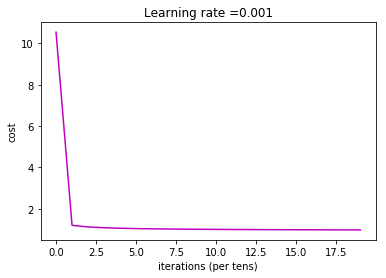

In [0]:
plt.figure()
plt.plot(costs1, 'm')
plt.ylabel('cost')
plt.xlabel('iterations (per tens)')
plt.title("Learning rate =" + str(0.001))
plt.show()

In [0]:
p = predict(DATA1.reshape(DATA1.shape[0], 1, DATA1.shape[1]).T, LABELS1.reshape(LABELS1.shape[0], 1, LABELS1.shape[1]).T, parameters1)

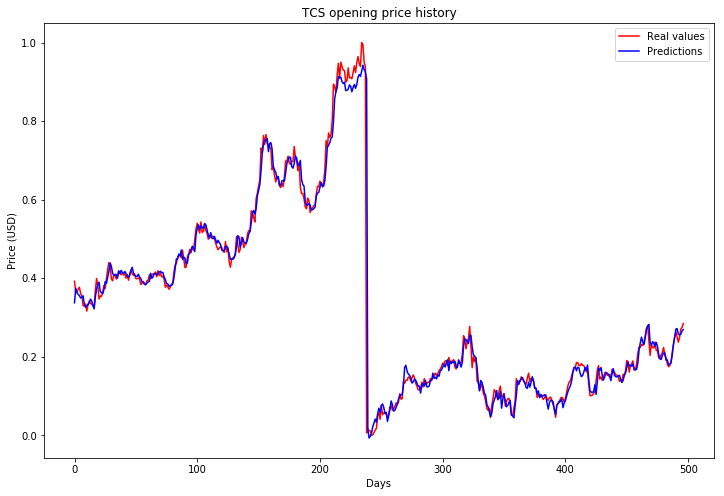

In [0]:
plt.figure(figsize=(12,8))
plt.plot(LABELS1, 'r')
plt.plot(p.reshape(LABELS1.shape[0]), 'b')
plt.title('TCS opening price history')
plt.ylabel('Price (USD)')
plt.xlabel('Days')
plt.legend(["Real values", "Predictions"], loc='upper right')
plt.show()

In [0]:
p1 = predict(testData.reshape(testData.shape[0], 1, testData.shape[1]).T, testLabels.reshape(testLabels.shape[0], 1, testLabels.shape[1]).T, parameters1)

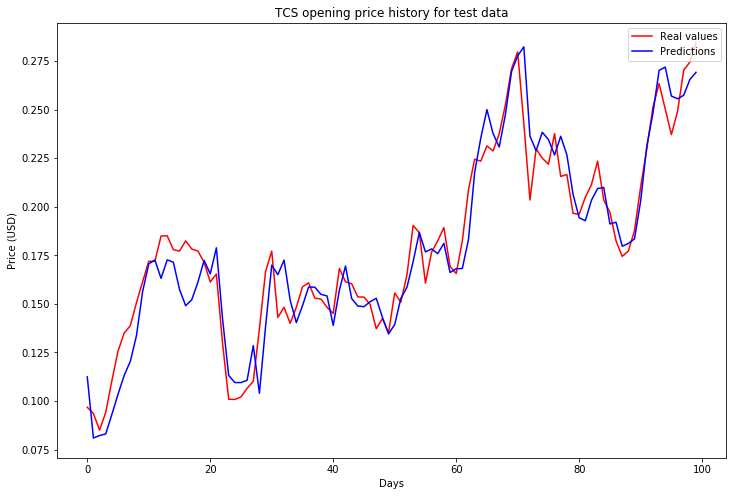

In [0]:
plt.figure(figsize=(12,8))
plt.plot(testLabels, 'r')
plt.plot(p1.reshape(testLabels.shape[0]), 'b')
plt.title('TCS opening price history for test data')
plt.ylabel('Price (USD)')
plt.xlabel('Days')
plt.legend(["Real values", "Predictions"], loc='upper right')
plt.show()